# 규제 선형 모델 Regularized Linear Models

- 릿지 Ridge, 라쏘 Lasso, 엘라스틱넷 ElasticNet



### Overfitting(과적합) 문제를 해결하는 방법
- 더 많은 데이터를 사용할 것
- 교차 검증 Cross Validation
- 규제 Regularization
- 더 이상 학습 데이터를 추가할 수 없거나 학습 데이터를 늘려도 과적합 문제가 해결되지 않을 때에는 Regularization을 사용

### 규제 선형 모델 개요
- 좋은 모델을 만들기 위해서는 회귀 모델은 적절하게 회귀 계수가 커지는 것을 제어 해야 함
- 이전까지는 선형 모델의 비용 함수는 실제 값과 예측 값의 차이를 최소화하는 것만 고려
- 비용 함수는 학습 데이터의 잔차 오류 값을 최소로 하는 방법과 과적합을 방지하기 위해 회귀 계수가 커지지 않도록 하는 방법이 서로 균형을 이뤄야 함

### 규제(Regularization)
- 규제된 손실함수 값 = (손실 함수 + 규제값)
- 이 규제 값을 어떤 것으로 할지에 대해 L1, L2 규제로 나뉨
- Lasso : RSS or MSE + α * L1규제
- Ridge : RSS or MSE + λ * L2규제


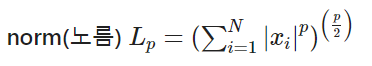

- 벡터의 길이 혹은 크기를 측정하는 방법(함수)
- p는 Lorm의 차수를 의미합니다. p가 1이면 L1 Norm이고 p가 2이면 L2 Norm
- n은 대상 벡터의 요소 수


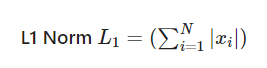

|
x
1
|
+
|
x
2
|
+
|
x
3
|
+
.
.
.
+
|
x
n
|

- 벡터의 요소에 대한 절댓값의 합
- 요소의 값 변화를 정확하게 파악
- 맨허튼 거리


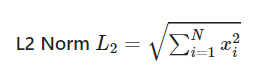

- 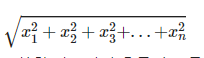

- n 차원 좌표평면(유클리드 공간)에서의 벡터의 크기를 계산
- 좌표 평면상의 최단 거리를 계산
- 유클리드 거리


https://ikso2000.tistory.com/22

### Ridge Regression


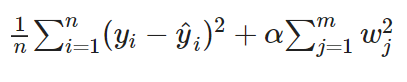

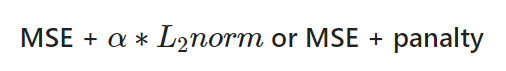

- w는 가중치(기울기)를 의미
- 모델의 복잡도 조정
- α를 곱한 L2규제항을 더한 것
- L2규제는 미분하면 α*w 가 남아서 가중치를 왼전히 0으로 만들지 않음
- α의 값을 통해서 규제의 강도를 조정할 수 있음

#### 보스턴 주택 가격 dataset을 사용하여 Ridge 클래스로 예측 및 성능을 평가

In [1]:
# 앞의 LinearRegression예제에서 분할한 feature 데이터 셋인 X_data과 Target 데이터 셋인 Y_target 데이터셋을 그대로 이용 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
%matplotlib inline
# boston 데이타셋 로드

boston = load_boston()

# boston 데이타셋 DataFrame 변환 
bostonDF = pd.DataFrame(boston.data , columns = boston.feature_names)

# boston dataset의 target array는 주택 가격임. 이를 PRICE 컬럼으로 DataFrame에 추가함. 
bostonDF['PRICE'] = boston.target
print('Boston 데이타셋 크기 :',bostonDF.shape)

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)


ridge = Ridge(alpha = 10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, 
                                 scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))


Boston 데이타셋 크기 : (506, 14)
 5 folds 의 개별 Negative MSE scores:  [-11.422 -24.294 -28.144 -74.599 -28.517]
 5 folds 의 개별 RMSE scores :  [3.38  4.929 5.305 8.637 5.34 ]
 5 folds 의 평균 RMSE : 5.518 


C:\Users\NOTEBOOK\.conda\envs\py38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing 

alpha값을 0 , 0.1 , 1 , 10 , 100 으로 변경하면서 RMSE 측정


In [3]:
# Ridge에 사용될 alpha 파라미터의 값들을 정의
alphas = [0 , 0.1 , 1 , 10 , 100]

# alphas list 값을 iteration하면서 alpha에 따른 평균 rmse 구함.
for alpha in alphas :
    ridge = Ridge(alpha = alpha)
    
    #cross_val_score를 이용하여 5 fold의 평균 RMSE 계산
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f} '.format(alpha,avg_rmse))


alpha 0 일 때 5 folds 의 평균 RMSE : 5.829 
alpha 0.1 일 때 5 folds 의 평균 RMSE : 5.788 
alpha 1 일 때 5 folds 의 평균 RMSE : 5.653 
alpha 10 일 때 5 folds 의 평균 RMSE : 5.518 
alpha 100 일 때 5 folds 의 평균 RMSE : 5.330 


### 각 alpha에 따른 회귀 계수 값을 시각화. 각 alpha값 별로 plt.subplots로 맷플롯립 축 생성


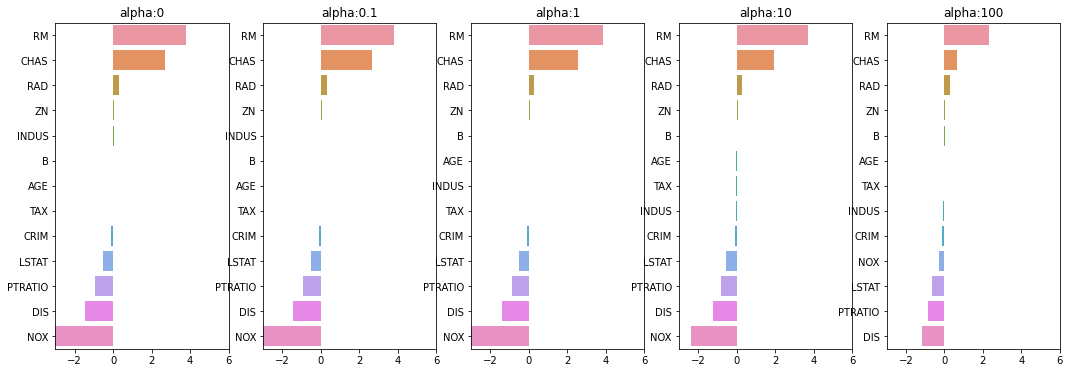

In [4]:
# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성  
fig , axs = plt.subplots(figsize=(18,6) , nrows=1 , ncols=5)
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성  
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos , alpha in enumerate(alphas) :
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_data , y_target)
    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가.  
    coeff = pd.Series(data=ridge.coef_ , index=X_data.columns )
    colname='alpha:'+str(alpha)
    coeff_df[colname] = coeff
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values , y=coeff.index, ax=axs[pos])

# for 문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()


alpha 값에 따른 컬럼별 회귀계수 출력



In [5]:
ridge_alphas = [0 , 0.1 , 1 , 10 , 100]
sort_column = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)


,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


### 라쏘 회귀


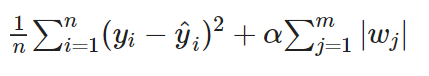

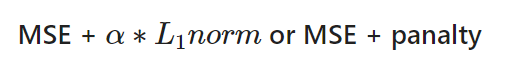

- w는 가중치(기울기)를 의미
- 모델의 특성을 선택하는 효과
- α를 곱한 L1규제항을 더한 것
- L1규제는 미분하면 부호만 남아서 상수값이 되어 α에 많이 의존함
- 가중치가 너무 작은 경우는 상수 값에 의해서 weight가 0이 되어버림
- 결과적으로 몇몇 중요한 가중치 들만 남음


In [6]:
from sklearn.linear_model import Lasso

# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환 
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, 
                        verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose : print('####### ', model_name , '#######')
    for param in params:
        if model_name =='Ridge': model = Ridge(alpha=param)
        elif model_name =='Lasso': model = Lasso(alpha=param)

        neg_mse_scores = cross_val_score(model
                                         , X_data_n
                                         , y_target_n
                                         , scoring="neg_mean_squared_error"
                                         , cv = 5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param, avg_rmse))
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
        
        model.fit(X_data_n , y_target_n)
        if return_coeff:
            # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가. 
            coeff = pd.Series(data=model.coef_ , index=X_data_n.columns )
            colname='alpha:'+str(param)
            coeff_df[colname] = coeff
    
    return coeff_df
# end of get_linear_regre_eval


In [7]:
# 라쏘에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
lasso_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df =get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_data, y_target_n=y_target)


#######  Lasso #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.612 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.615 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.669 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.776 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.189 


In [8]:
print(lasso_alphas)


[0.07, 0.1, 0.5, 1, 3]


In [9]:
# 반환된 coeff_lasso_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)


,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


alpha 값이 증가함에 따라 일부 feature의 회귀 계수는 0으로 바뀌는 것을 볼 수 있다. 이렇게 회귀 계수가 0인 feature가 회귀 식에서 제외되면서 L1 규제를 이용하여 feature 선택의 효과를 얻을 수 있다.



## 엘라스틱넷 회귀
- 엘라스틱넷(Elastic Net) 회귀는 L2 규제와 L1 규제를 결합한 회귀
- L2 규제를 라쏘 회귀에 추가한 것(단점인 alpha 값에 따른 변동성 완화)
- 단점은 L1과 L2 규제가 결합된 규제로 인해 수행시간이 상대적으로 오래 걸리는 것

#### 사이킷런은 ElasticNet 클래스 주요 파라미터
- alpha와 l1_ratio
- 엘라스틱넷의 규제는 aL1 + bL2로 정의
- alpha = a + b
- l1_ratio = a / (a + b)
- l1_ratio=0 이면 a가 0이므로 L2 규제
- l1_ratio=1 이면 b가 0이므로 L1 규제


In [13]:
# 엘라스틱넷에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
# alpha 값 확인을 위해 l1_ratio는 0.7로 고정
elastic_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df =get_linear_reg_eval('ElasticNet', params=elastic_alphas,
                                      X_data_n=X_data, y_target_n=y_target)


#######  ElasticNet #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.542 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.526 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.467 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.597 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.068 


In [14]:
from sklearn.linear_model import Lasso, ElasticNet

# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환 
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, 
                        verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose : print('####### ', model_name , '#######')
    for param in params:
        if model_name =='Ridge': model = Ridge(alpha=param)
        elif model_name =='Lasso': model = Lasso(alpha=param)
        elif model_name =='ElasticNet': model = ElasticNet(alpha=param
                                                           , l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model
                                         , X_data_n
                                         , y_target_n
                                         , scoring="neg_mean_squared_error"
                                         , cv = 5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param, avg_rmse))
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
        
        model.fit(X_data_n , y_target_n)
        if return_coeff:
            # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가. 
            coeff = pd.Series(data=model.coef_ , index=X_data_n.columns )
            colname='alpha:'+str(param)
            coeff_df[colname] = coeff
    
    return coeff_df
# end of get_linear_regre_eval


In [15]:
# 반환된 coeff_elastic_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)


,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000


alpha가 0.5일 때 RMSE가 5.468로 가장 좋은 예측 성능을 보이고, 이전의 라쏘보다는 상대적으로 0이 되는 값이 적다는 것을 알 수 있다.



## 선형 회귀 모델을 위한 데이터 변환
- 선형 모델은 일반적으로 feature와 target 간에 선형의 관계에 있다고 가정
- 선형 회귀 모델은 feature와 target의 분포가 정규 분포 형태인 경우를 매우 선호
- 특히 target은 정규 분포 형태가 아닌 특정값의 분포가 치우친 왜곡(Skew)된 형태의 분포도일 경우 예측 성능에 부정적인 영향을 미칠 가능성이 높음
- 선형 회귀 모델을 적용하기 전에 먼저 데이터에 대한 스케일링/정규화 작업을 수행하는 것이 일반적

### feature dataset과 target dataset의 스케일링/정규화 작업을 수행하는 방법

#### feature dataset
- 1번. StandardScaler 클래스를 이용해 평균이 0, 분산이 1인 표준 정규 분포를 가진 dataset으로 변환하거나 MinMaxScaler 클래스를 이용해 최솟값이 0이고, 최대값이 1인 값으로 정규화를 수행
- 2번. 스테일링/정규화를 수행한 dataset에 다시 다항 특성을 적용하여 변환하는 방법이다. 보통 1번 방법을 통해 예측 성능에 향상이 없을 경우 이와 같은 방법을 적용
- 3번. 원래 값에 log 함수를 적용하면 보다 정규 분포에 가까운 형태로 값이 분포하게 된다. 이러한 변환을 로그 변환(Log Transformation)이라고 부름
- 실제로 선형 회귀에서는 앞에서 소개한 1,2번 방법보다 로그 변환이 훨씬 많이 사용되는 변환 방법
- 1번 방법의 경우 예측 성능 향상을 크게 기대하기 어려운 경우가 많으며 2번 방법의 경우 feature의 개수가 매우 많을 경우에는 다향 변환으로 생성되는 feature의 개수가 기하급수로 늘어나서 과적합의 이슈가 발생할 수 있기 때문

#### target dataset
- 일반적으로 로그 변환을 사용
- 결정 값을 정규 분포나 다른 정규값으로 변환하면 다시 원본 target 값으로 복원하기 어려움
- 왜곡된 분포도 형태의 target 값을 로그 변환하여 예측 성능 향항이 된 경우가 많은 사례에서 검증


### 정규 분포 변환, 최대/최소값 정규화, 로그 변환과, degree를 추가,미추가 나누어서 RMSE 값 확인 함수 작성


In [16]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

# method는 표준 정규 분포 변환(Standard), 최대값/최소값 정규화(MinMax), 로그변환(Log) 결정
# p_degree는 다향식 특성을 추가할 때 적용. p_degree는 2이상 부여하지 않음. 
def get_scaled_data(method='None', p_degree=None, input_data=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data

    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree, 
                                         include_bias=False).fit_transform(scaled_data)
    
    return scaled_data


Ridge 클래스를 사용하며 alpha 값에 따른 변화에 따를 RMSE 값 확인


In [17]:
# Ridge의 alpha값을 다르게 적용하고 다양한 데이터 변환방법에 따른 RMSE 추출. 
alphas = [0.1, 1, 10, 100]
#변환 방법은 모두 6개, 원본 그대로, 표준정규분포, 표준정규분포+다항식 특성
# 최대/최소 정규화, 최대/최소 정규화+다항식 특성, 로그변환 
scale_methods=[(None, None), ('Standard', None), ('Standard', 2), 
               ('MinMax', None), ('MinMax', 2), ('Log', None)]
for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(method=scale_method[0], p_degree=scale_method[1], 
                                    input_data=X_data)
    print(X_data_scaled.shape, X_data.shape)
    print('\n## 변환 유형:{0}, Polynomial Degree:{1}'.format(scale_method[0], scale_method[1]))
    get_linear_reg_eval('Ridge', params=alphas, X_data_n=X_data_scaled, 
                        y_target_n=y_target, verbose=False, return_coeff=False)


(506, 13) (506, 13)

## 변환 유형:None, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.788 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.653 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.518 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 5.330 
(506, 13) (506, 13)

## 변환 유형:Standard, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.826 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.803 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.637 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 5.421 
(506, 104) (506, 13)

## 변환 유형:Standard, Polynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 8.827 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 6.871 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.485 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 4.634 
(506, 13) (506, 13)

## 변환 유형:MinMax, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.764 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.465 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.754 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 7.635 
(506, 104) (506, 13)

## 변환 유형:MinMax, Polynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.298 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 4.323 
alpha 10일 때 5 폴드 세트의 평균 RMS

- 표준 정규 분포와 최대/최소값 정규화로 feature dataset을 변경해도 성능의 개선이 없다
- 2차 다항식으로 변환시 성능 개선이 있지만 feature의 개수가 많을 경우 적용하지 힘들고 시간 소모가 많아짐
- 로그 변환을 보면 모든 alpha 값에 대해 비교적 좋은 성능 향상
